In [46]:
# Initial imports
from pathlib import Path
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [47]:
file_path = Path("crypto_data.csv")
df = pd.read_csv(file_path, index_col=0)
df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


Data Pre-processing

In [48]:
crypto_df = df[df['IsTrading'] == True]
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [49]:
crypto_df = crypto_df.drop(columns='IsTrading')
crypto_df.tail()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [50]:
crypto_df = crypto_df.dropna()
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [51]:
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [52]:
crypto_df = crypto_df[crypto_df!='N/A']
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [53]:
coin_name_df = df['CoinName']
coin_name_df.head()

42       42 Coin
365      365Coin
404      404Coin
611    SixEleven
808          808
Name: CoinName, dtype: object

In [54]:
crypto_df.drop(columns='CoinName', inplace=True)
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [55]:
crypto_df.shape

(532, 4)

In [56]:
# convert the remaining features with text values, Algorithm and ProofType, into numerical data

X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X.shape

(532, 98)

In [57]:
# Standardize data so that columns that contain larger values do not unduly influence the outcome
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

Dimensionality Reduction 

In [58]:
pca = PCA(n_components=3)

crypto_pca = pca.fit_transform(X_scaled)

In [59]:
pca_df = pd.DataFrame(
    data=crypto_pca,
    index= crypto_df.index
)
pca_df.head()

,0,1,2
42,-0.335993,1.056136,-0.592466
404,-0.319334,1.056328,-0.592944
1337,2.298435,1.670863,-0.694461
BTC,-0.148066,-1.287769,0.204203
ETH,-0.150670,-2.014449,0.412463


In [60]:
from sklearn.manifold import TSNE

In [61]:
tsne = TSNE(learning_rate=100)
tsne_features = tsne.fit_transform(X_scaled)

In [62]:
tsne_features.shape

(532, 2)

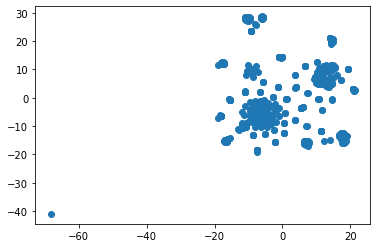

In [63]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

Cluster Analysis with K-means, elbow plot

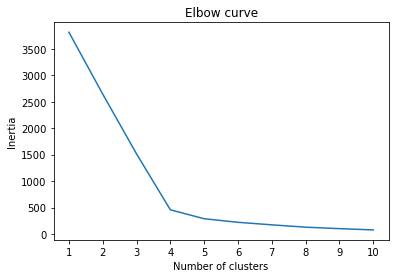

In [88]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=13)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# elbow plot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()



In [72]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=13)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [75]:
# analyzing 'clusters' with best k-value
clusters = get_clusters(4, pca_df)

In [76]:
clusters

,0,1,2,class
42,-0.335993,1.056136,-0.592466,0
404,-0.319334,1.056328,-0.592944,0
1337,2.298435,1.670863,-0.694461,0
BTC,-0.148066,-1.287769,0.204203,1
ETH,-0.150670,-2.014449,0.412463,1
...,...,...,...,...
ZEPH,2.472539,0.824032,-0.098501,0
GAP,-0.334040,1.056029,-0.592499,0
BDX,0.317259,-2.307279,0.400771,1
ZEN,-0.139481,-2.214440,0.453541,1


In [86]:
# def show_clusters(df):
#     plt.scatter(pca_df[['1'], pca_df['2'], c=pca_df['class'])
#     plt.xlabel('X-Axis')
#     plt.ylabel('Y-Axis')
#     plt.show()
def show_clusters(df):
    plt.scatter(pca_df['1'], pca_df['2'], c=pca_df['class'])
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.show()

In [87]:
show_clusters(clusters)

KeyError: '1'